In [1]:
!nvidia-smi

Sat Jul 27 17:53:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
%cd {HOME}

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1oxw6NIUw7VCoGnyMGYa")
project = rf.workspace("traffic-light-and-traffic-signs-detection-and-recognition-in-heavy-rainy-weather-condition-ydabc").project("traffic-detection-in-heavy-rain1")
version = project.version(2)
dataset = version.download("yolov8")


/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.67, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Traffic-Detection-in-Heavy-Rain1-2 in yolov8:: 100%|██████████| 2411/2411 [00:00<00:00, 7812.79it/s]


In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Traffic-Detection-in-Heavy-Rain1-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

/content


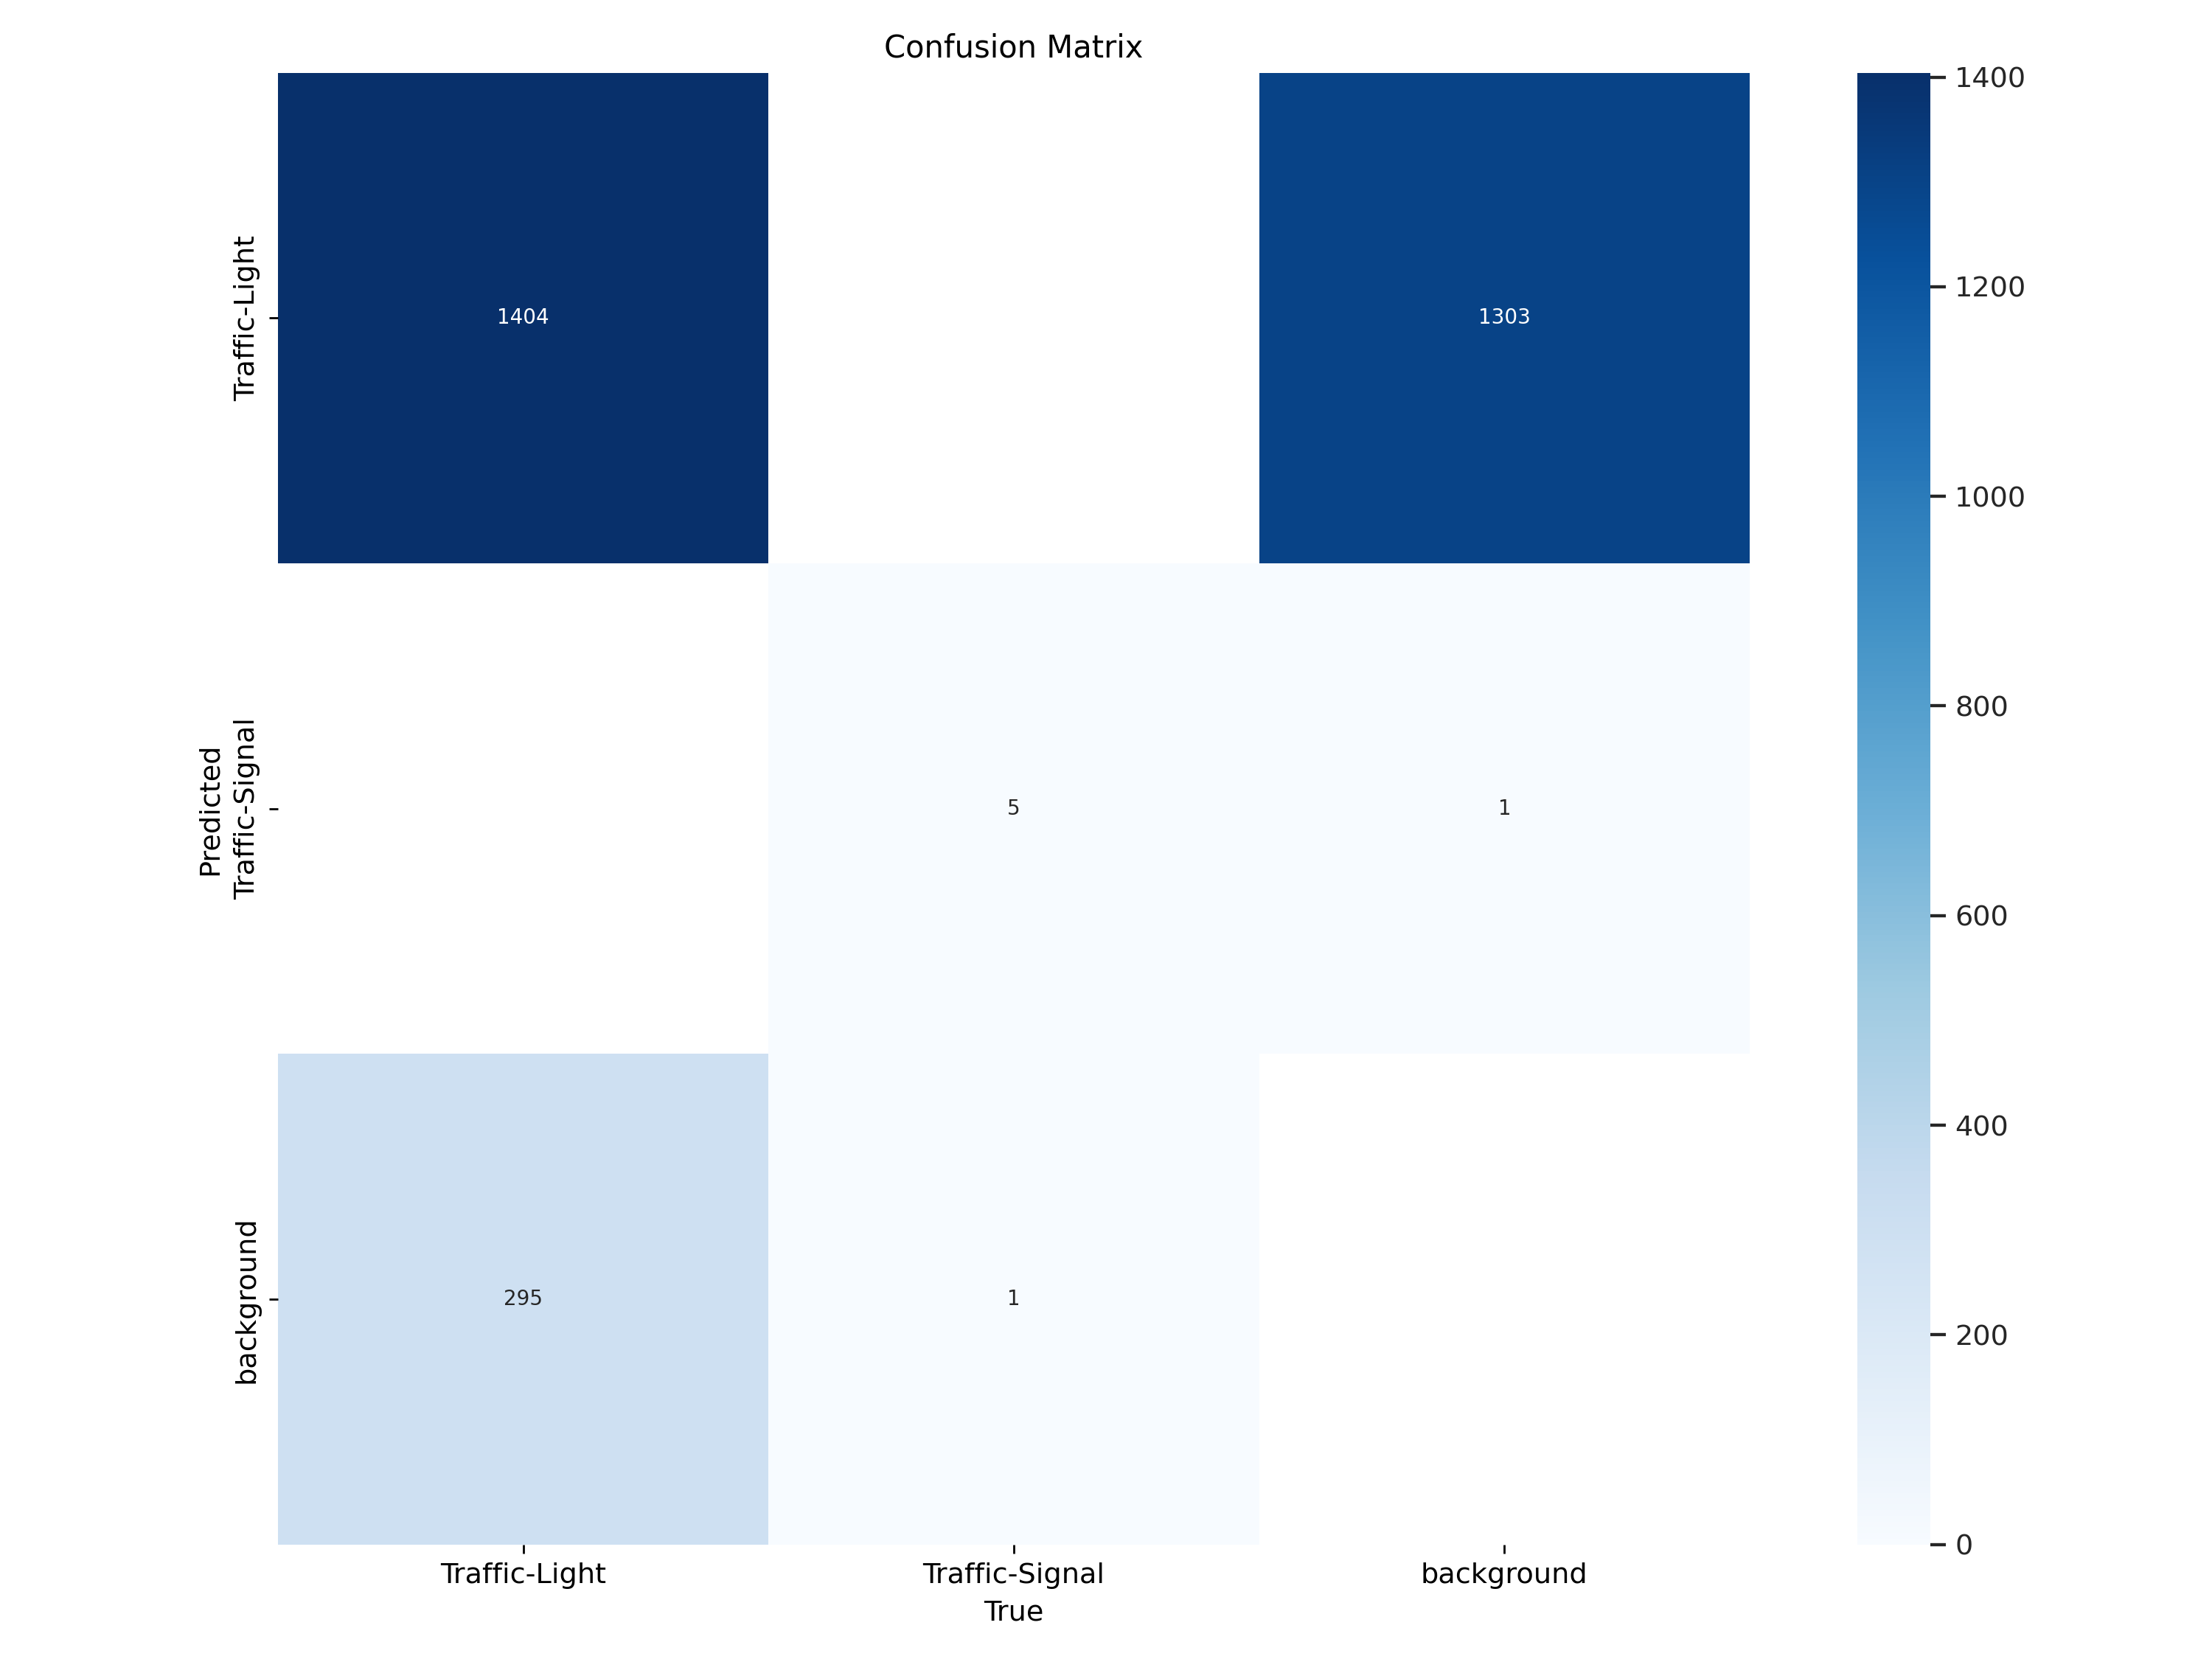

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


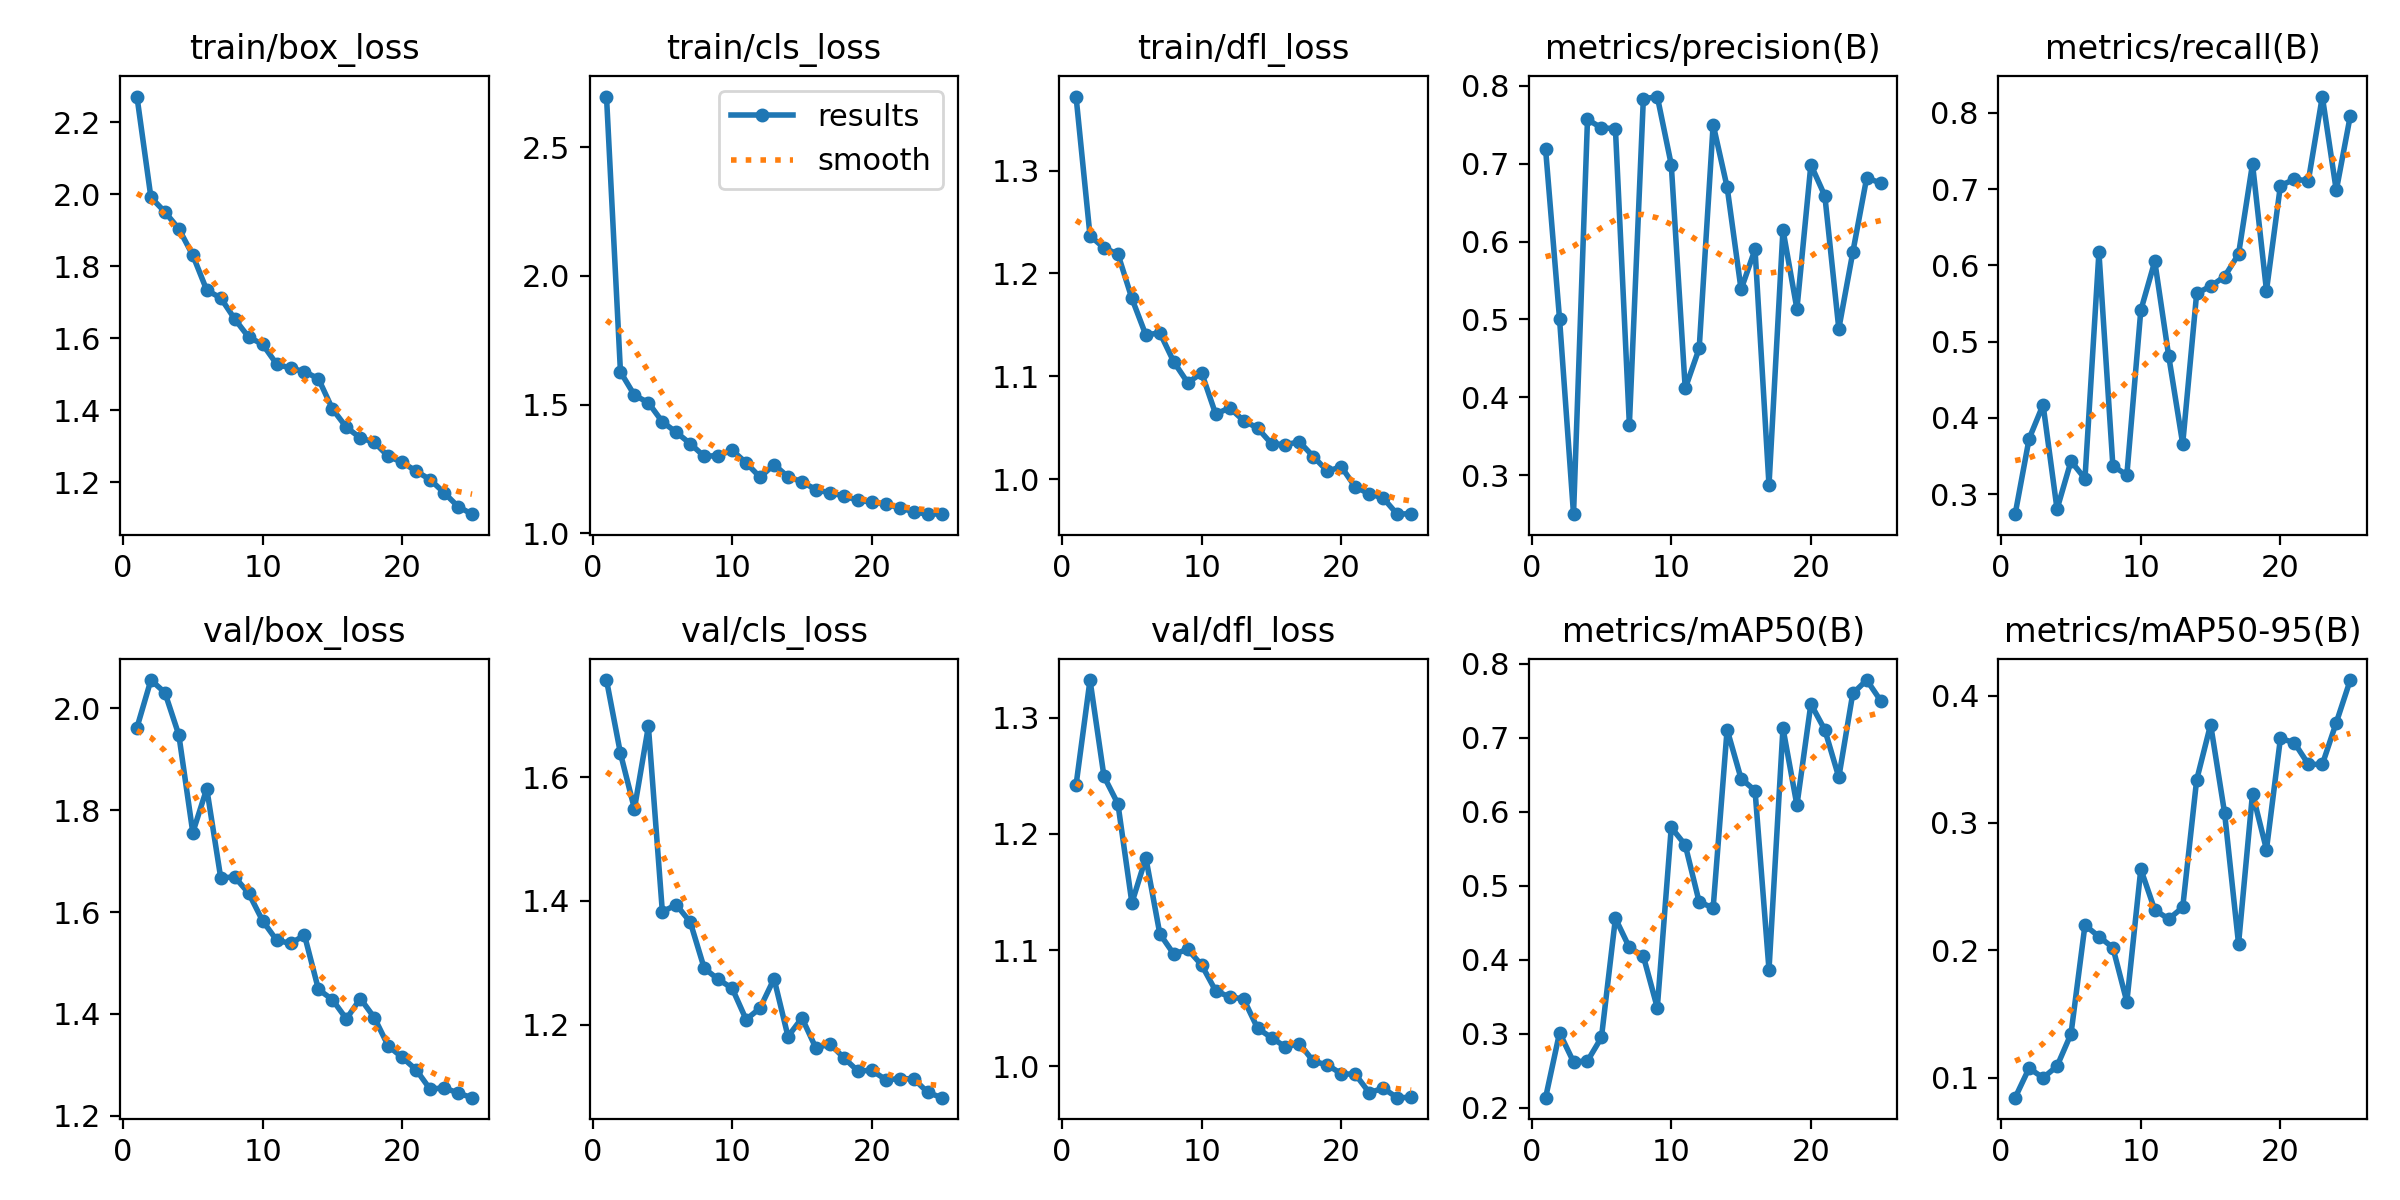

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


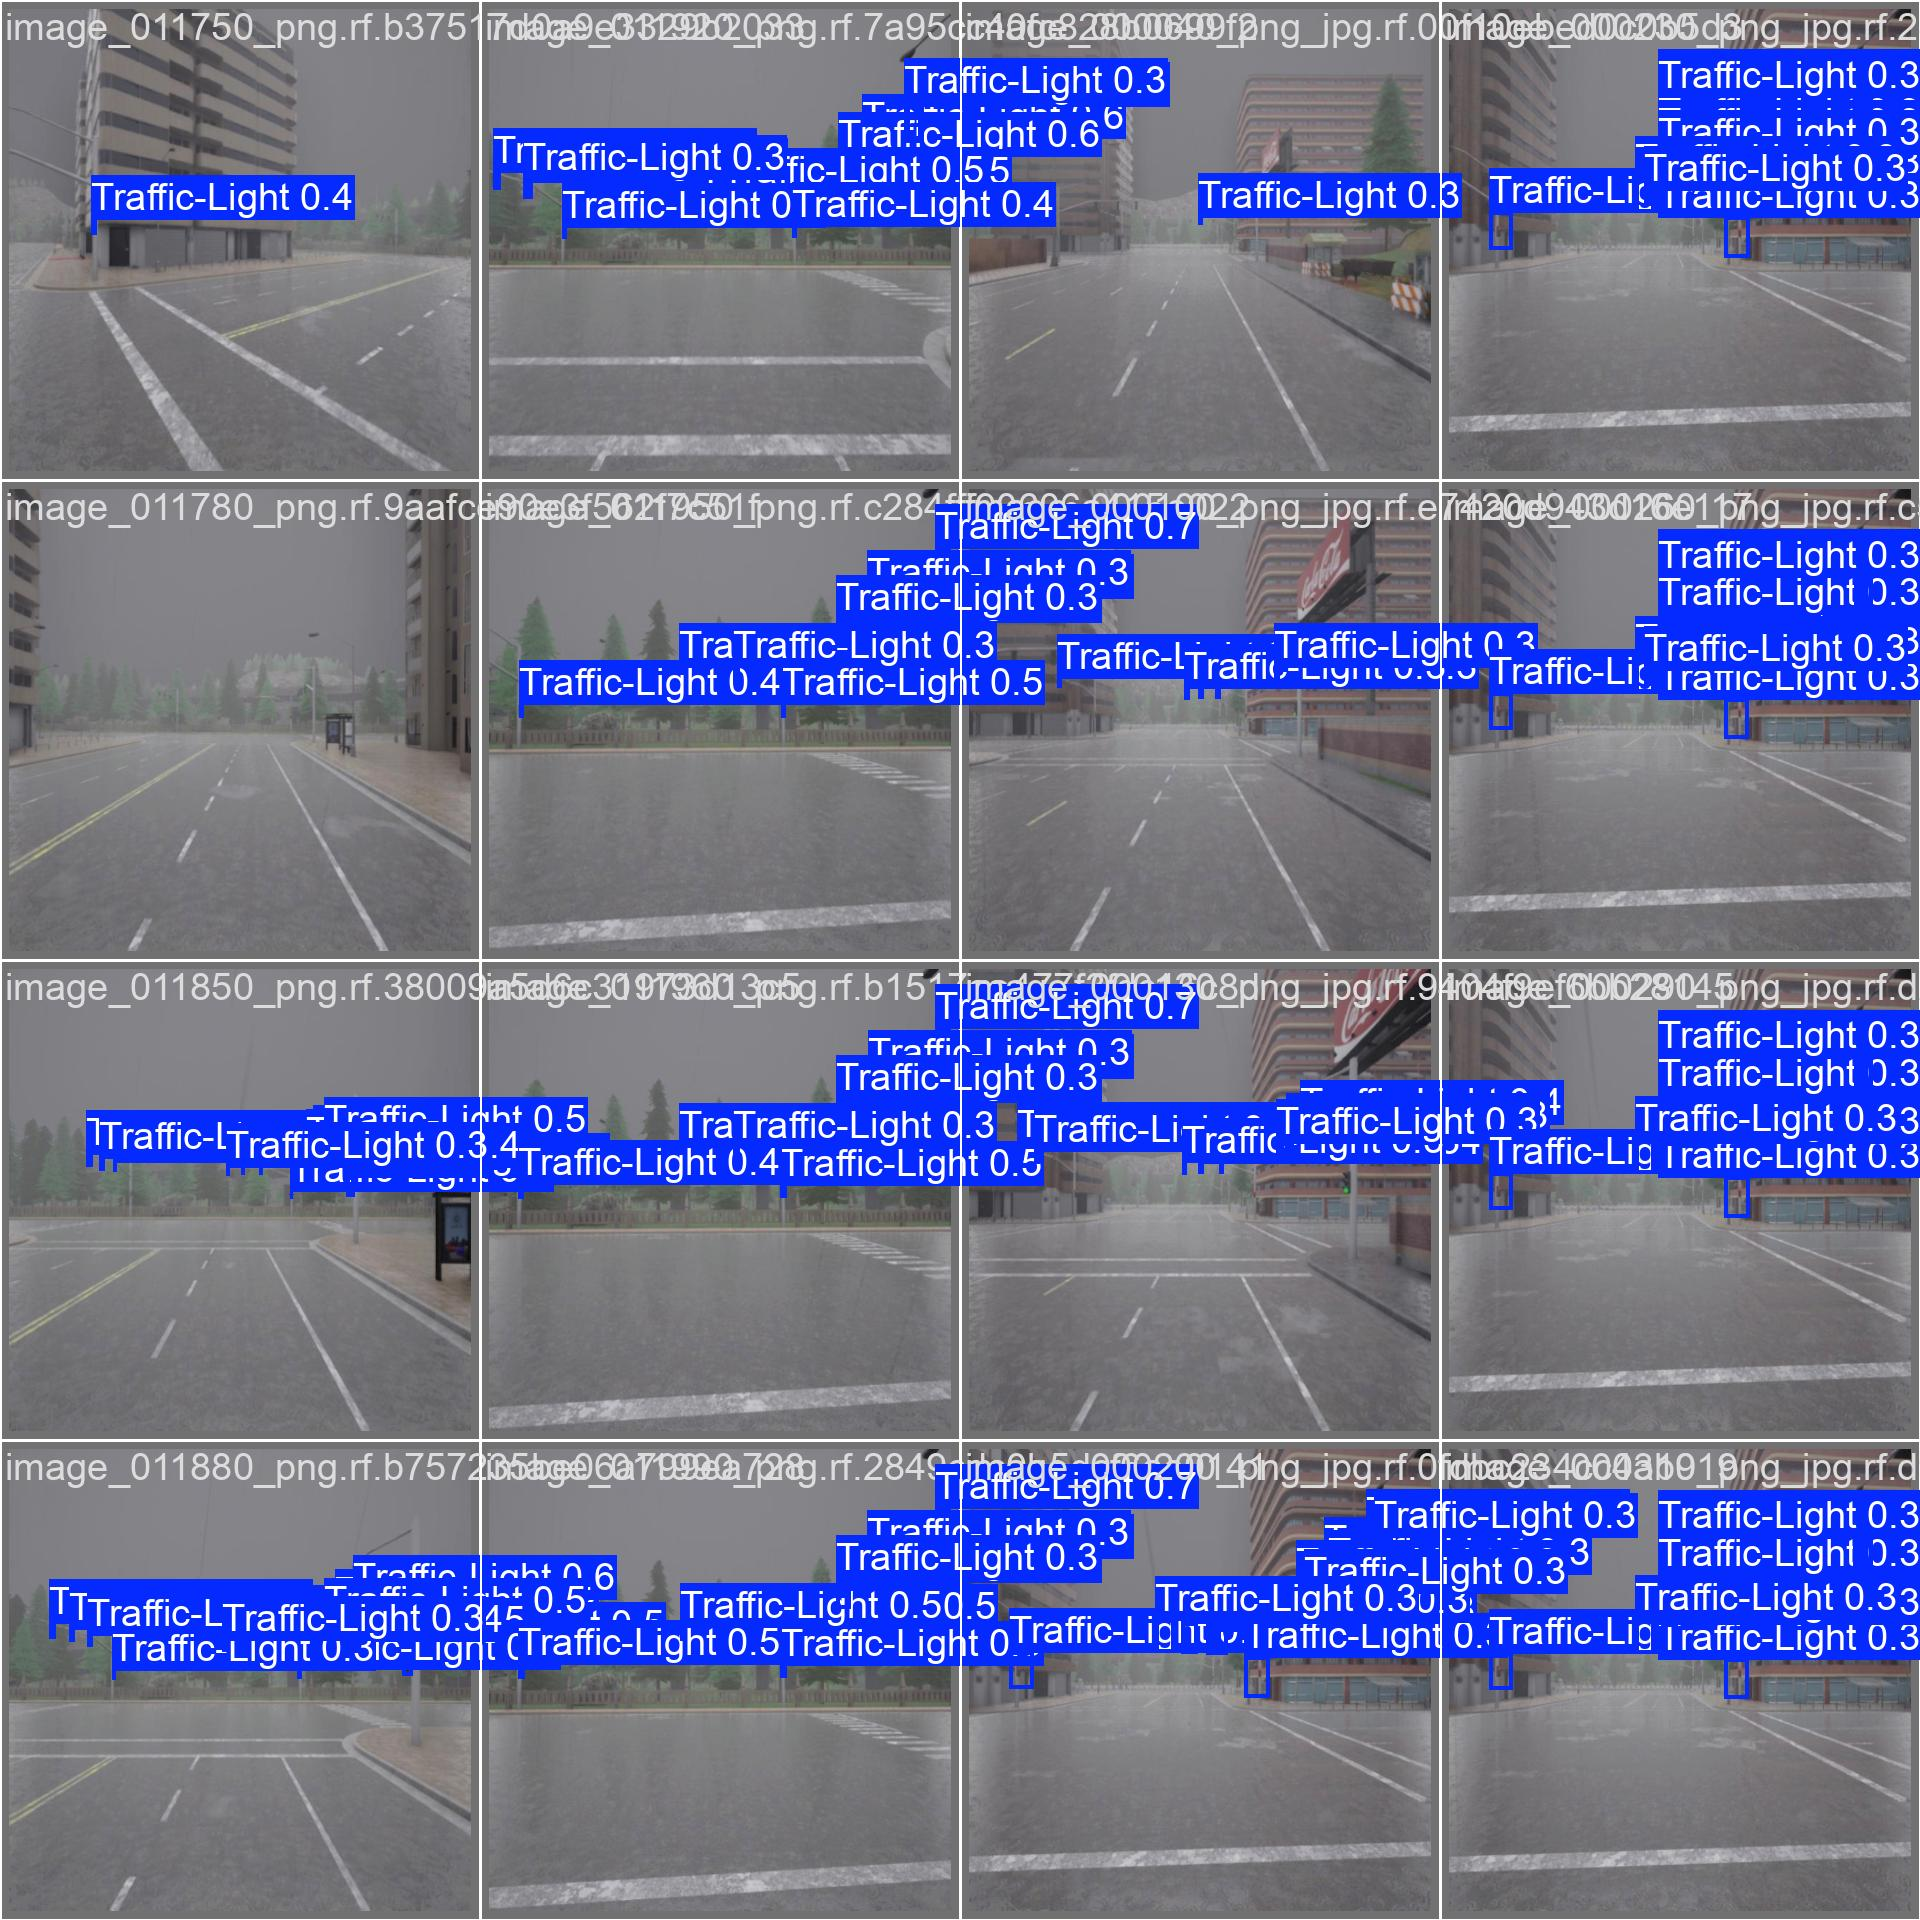

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [17]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Traffic-Detection-in-Heavy-Rain1-2/valid/labels.cache... 240 images, 37 backgrounds, 0 corrupt: 100% 240/240 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1705. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:13<00:00,  1.11it/s]
                   all        240       1705      0.675      0.797      0.751      0.413
         Traffic-Light        200       1699      0.518      0.767       0.67      0.366
        Traffic-Signal          3          6      0.832      0.826      0.832      0.459
Speed: 2

In [18]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

image 1/120 /content/Traffic-Detection-in-Heavy-Rain1-2/test/images/image_000060_png_jpg.rf.512f076d63eae5098efc2ebe0f2dba09.jpg: 800x800 2 Traffic-Lights, 22.5ms
image 2/120 /content/Traffic-Detection-in-Heavy-Rain1-2/test/images/image_000110_png_jpg.rf.368ae6110c92dd68f61985f54bc50ab5.jpg: 800x800 3 Traffic-Lights, 22.5ms
image 3/120 /content/Traffic-Detection-in-Heavy-Rain1-2/test/images/image_000330_png_jpg.rf.4ef54939d09e007baab85d38914e1fab.jpg: 800x800 13 Traffic-Lights, 22.4ms
image 4/120 /content/Traffic-Detection-in-Heavy-Rain1-2/test/images/image_000450_png_jpg.rf.304711de647acf13863e6a48d9bc1a04.jpg: 800x800 12 Traffic-Lights, 22.4ms
image 5/120 /content/Traffic-Detection-in-Heavy-Rain1-2/test/images/image_000500_png_jpg.rf.f38d269ff824bf181d7f96fc7e18870e.jpg: 800x800 3 Traffic-Lights, 22.4ms
ima

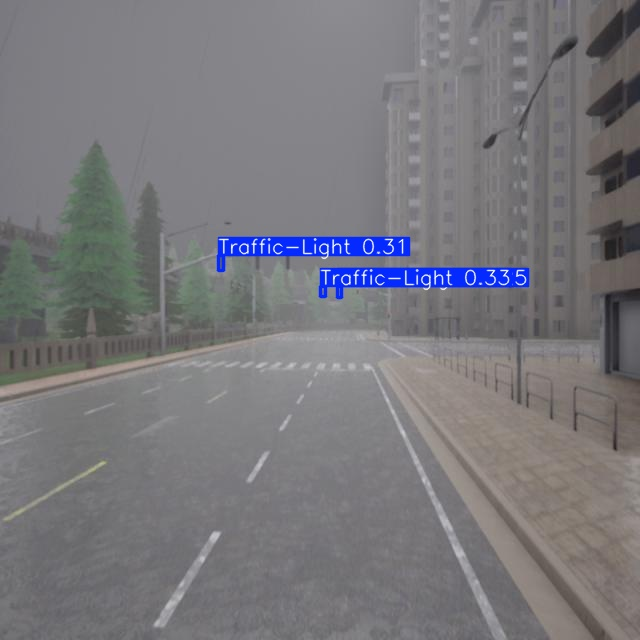

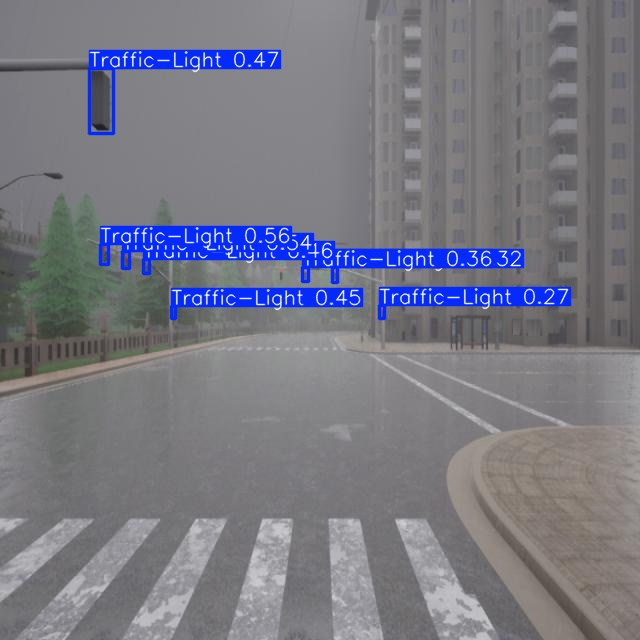

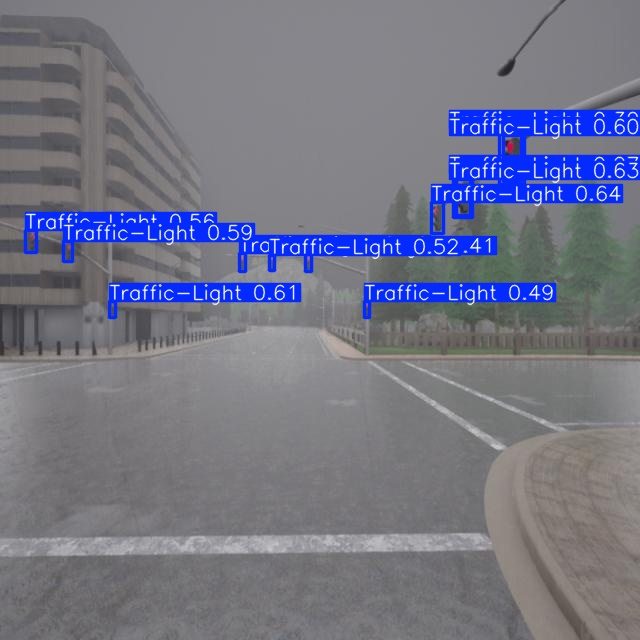

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [20]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2")

Dependency ultralytics==8.0.196 is required but found version=8.2.67, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/traffic-light-and-traffic-signs-detection-and-recognition-in-heavy-rainy-weather-condition-ydabc/traffic-detection-in-heavy-rain1/2


In [26]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('/content/yolov8n.pt')

In [27]:
# Evaluate the model
results = model.val(data='/content/Traffic-Detection-in-Heavy-Rain1-2/data.yaml', imgsz=640)

Ultralytics YOLOv8.2.67 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /content/Traffic-Detection-in-Heavy-Rain1-2/valid/labels.cache... 240 images, 37 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1705. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.67it/s]


                   all        240       1705     0.0426      0.209     0.0299     0.0101
                person        200       1699      0.077      0.252     0.0541     0.0175
               bicycle          3          6     0.0082      0.167    0.00563    0.00281
Speed: 1.9ms preprocess, 7.2ms inference, 0.1ms loss, 9.0ms postprocess per image
Results saved to runs/detect/val2
